In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.0.0-beta0


In [4]:
from six.moves import cPickle as pickle
import multiprocessing as mp
import numpy as np
import pickle as pk
import collections
print('start loading notMNIST.pickle')
with open('C:/Users/lym/自然语言处理/notMNIST.pickle','rb') as f:
    data = pickle.load(f)
print('loading finished')
train_dt = data['train_dataset']
train_lb = data['train_labels']
test_dt = data['test_dataset']
test_lb = data['test_labels']
valid_dt = data['valid_dataset']
valid_lb = data['valid_labels']
print(train_dt.shape,train_lb.shape,test_dt.shape,test_lb.shape)

start loading notMNIST.pickle
loading finished
(200000, 28, 28) (200000,) (10000, 28, 28) (10000,)


In [5]:
print(train_lb[0])

4


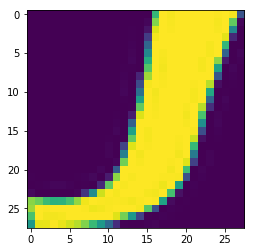

9


In [6]:
plt.imshow(train_dt[7])
plt.show()
print(train_lb[7])

In [15]:
image_size = 28
num_labels = 10
from sklearn.preprocessing import OneHotEncoder
def reformat(dataset,labels):
    dataset = dataset.reshape((-1,image_size*image_size)).astype(np.float32)
    enc = OneHotEncoder(sparse=False)
    labels = enc.fit_transform(labels.reshape(-1,1))
    return dataset,labels
train_dataset, train_labels = reformat(train_dt, train_lb)
valid_dataset, valid_labels = reformat(valid_dt, valid_lb)
test_dataset, test_labels = reformat(test_dt, test_lb)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before

In [19]:
print(train_labels)
print(train_labels[1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [38]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])
model.build(input_shape=[None,28*28])   #模型的输入为[None,28*28] 的数据
model.summary()
model.compile(optimizer = keras.optimizers.Adam(lr=0.001),loss = tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_dataset,train_labels,epochs=20,validation_data = (valid_dataset,valid_labels),validation_freq=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  235500    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  30100     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 200000 samples, validate on 10000 samples
Epoch 1/20
200000/200000 [==============================] - 35s

## 由上面的结果可知，用全连接层训练20次能得到94.7%的精确度, 但是添加两个dropout层之后准确率降低了
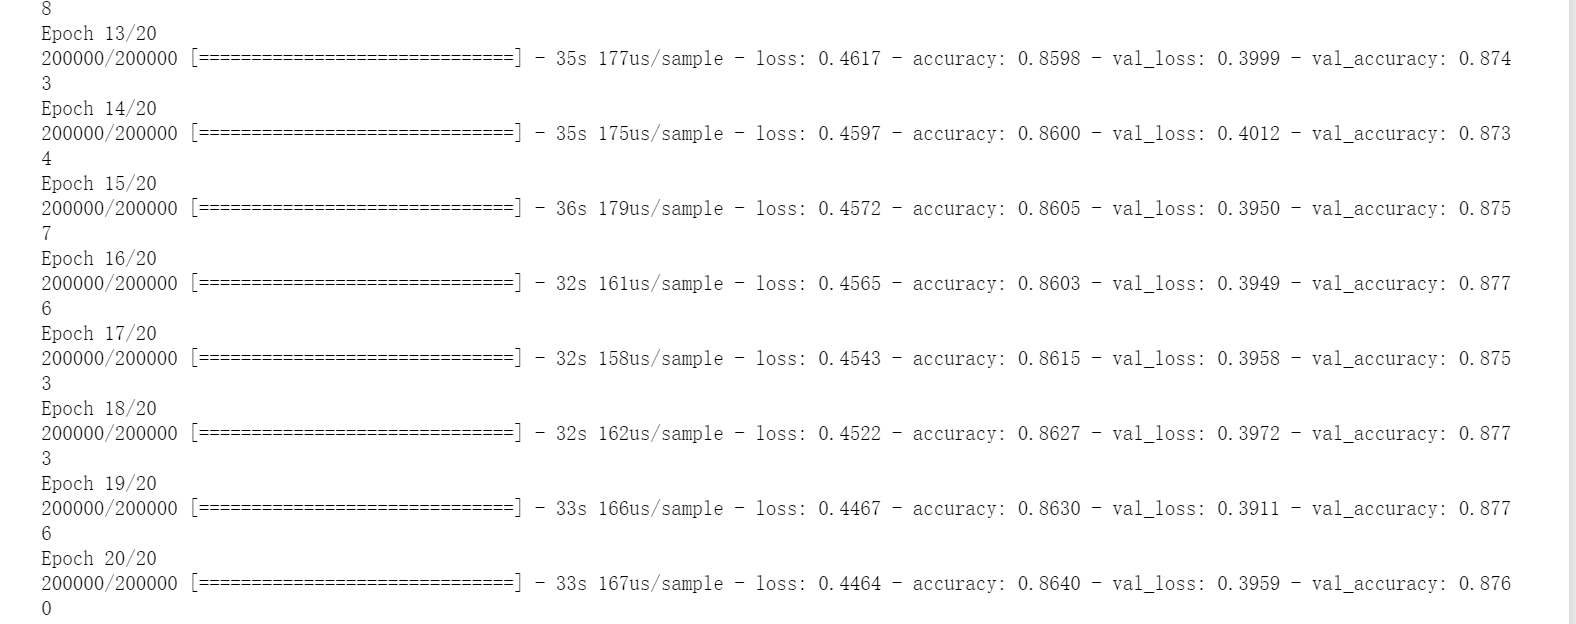
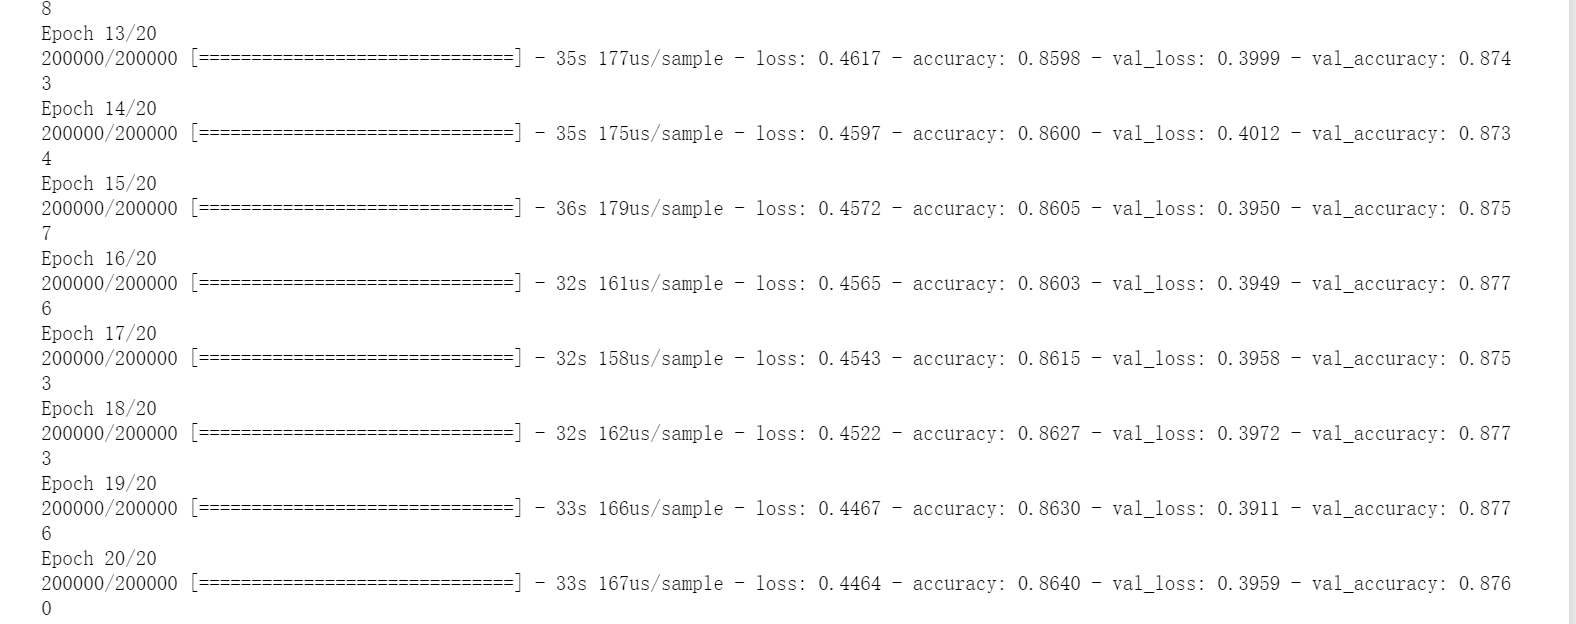

In [34]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


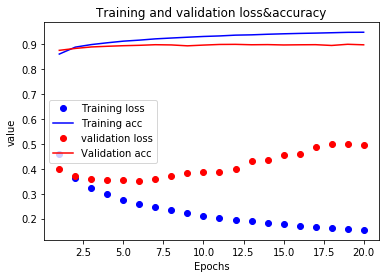

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
epochs2 = range(1,len(val_acc)+1)


plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs2,val_loss,'ro',label = 'validation loss')
plt.plot(epochs2,val_acc,'r',label='Validation acc')
plt.title('Training and validation loss&accuracy')
plt.xlabel('Epochs')
plt.ylabel('value')
plt.legend()
plt.show()

In [36]:
model.evaluate(test_dataset,test_labels)    #用测试集测试一下，准确率能达到95%

10000/10000 [==============================] - 1s 69us/sample - loss: 0.1879 - accuracy: 0.9559


[0.1878880545358872, 0.9559]